<a href="https://colab.research.google.com/github/FarhathCader/Image_Processing_Assignement/blob/main/Image_Processing_Operations_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup complete. Image loaded successfully.


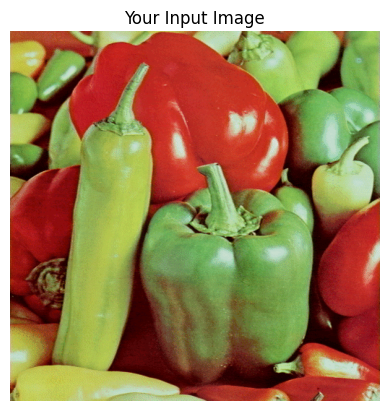

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Create directories for results ---
output_dir = 'results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

task_dirs = {
    'task1': os.path.join(output_dir, 'task1_intensity_reduction'),
    'task2': os.path.join(output_dir, 'task2_spatial_averaging'),
    'task3': os.path.join(output_dir, 'task3_image_rotation'),
    'task4': os.path.join(output_dir, 'task4_spatial_resolution')
}

for task, path in task_dirs.items():
    if not os.path.exists(path):
        os.makedirs(path)

# --- Load the input image ---
try:
    image_path = 'test_image.tif'
    image_color = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image_color is None:
        raise FileNotFoundError(f"Could not read image from {image_path}. Please check the file path.")

    # Convert to grayscale for tasks that require it
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    # Save the input images
    cv2.imwrite(os.path.join(output_dir, 'input_color_image.png'), image_color)
    cv2.imwrite(os.path.join(output_dir, 'input_grayscale_image.png'), image_gray)

    print("Setup complete. Image loaded successfully.")
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.title("Your Input Image")
    plt.axis('off')
    plt.show()

except FileNotFoundError as e:
    print(e)
    # Create a dummy image if no image file is found, so the script can still run
    print("Creating a dummy 100x100 black image to proceed.")
    image_color = np.zeros((100, 100, 3), dtype=np.uint8)
    image_gray = np.zeros((100, 100), dtype=np.uint8)

Performing Task 1: Reducing intensity levels...


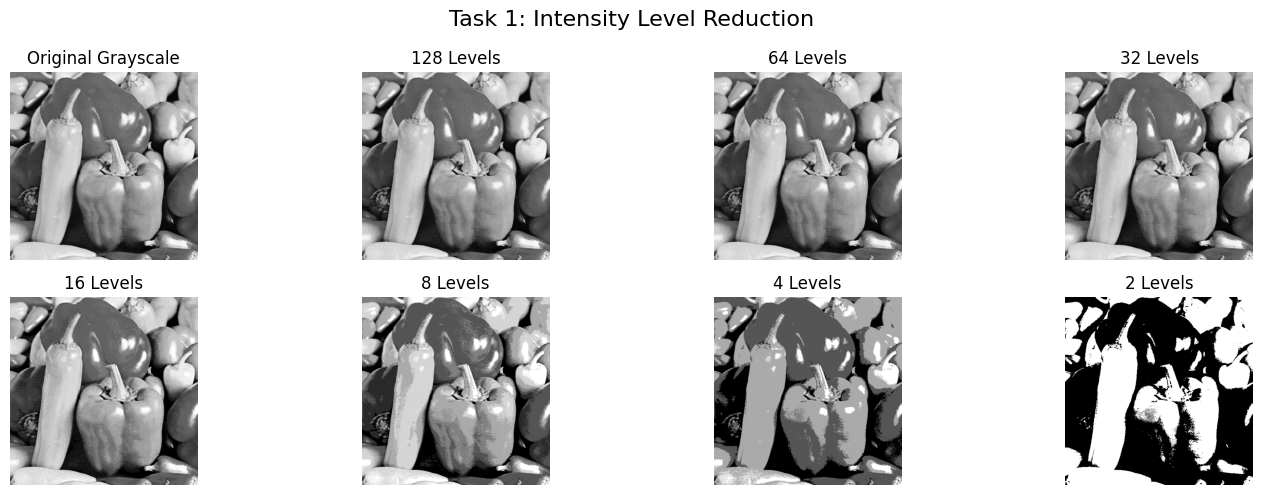

Task 1 complete. Results saved in: results/task1_intensity_reduction


In [ ]:
def reduce_intensity_levels(image, levels):
    """
    Reduces the number of intensity levels in a grayscale image.
    """
    if not (levels > 1 and (levels & (levels - 1) == 0)):
        raise ValueError("Number of levels must be a power of 2 and greater than 1.")
    factor = 256 / levels
    new_image = np.floor(image / factor) * (255 / (levels - 1))
    return new_image.astype(np.uint8)

# --- Run Task 1 ---
print("Performing Task 1: Reducing intensity levels...")
intensity_levels_to_test = [128, 64, 32, 16, 8, 4, 2]
reduced_intensity_images = []
for levels in intensity_levels_to_test:
    img = reduce_intensity_levels(image_gray, levels)
    reduced_intensity_images.append(img)
    cv2.imwrite(os.path.join(task_dirs['task1'], f'levels_{levels}.png'), img)

# --- Plot and save the combined result for Task 1 ---
plt.figure(figsize=(15, 5))
plt.suptitle("Task 1: Intensity Level Reduction", fontsize=16)
plt.subplot(2, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')
for i, img in enumerate(reduced_intensity_images):
    plt.subplot(2, 4, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"{intensity_levels_to_test[i]} Levels")
    plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(task_dirs['task1'], 'task1_combined_plot.png'))
plt.show()
print("Task 1 complete. Results saved in:", task_dirs['task1'])

Performing Task 2: Spatial averaging...


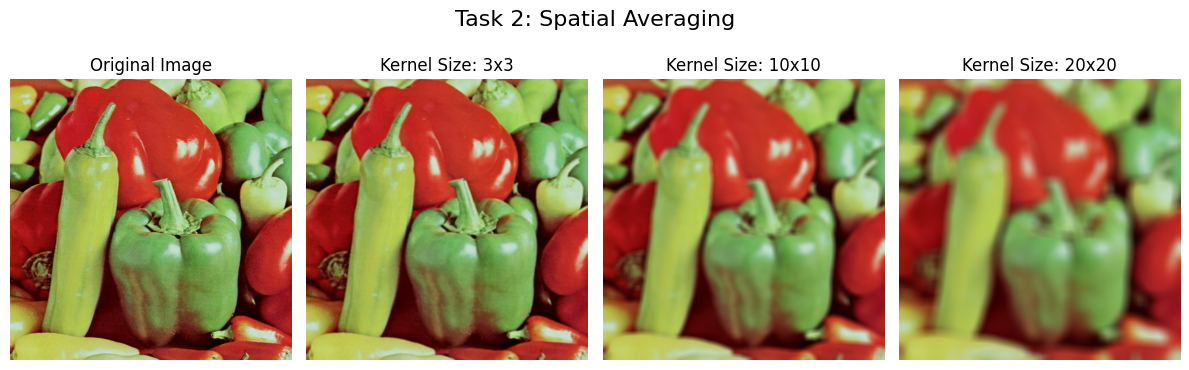

Task 2 complete. Results saved in: results/task2_spatial_averaging


In [ ]:
def spatial_average(image, kernel_size):
    """
    Performs spatial averaging (blurring) on an image using a square kernel.
    """
    return cv2.blur(image, (kernel_size, kernel_size))

# --- Run Task 2 ---
print("Performing Task 2: Spatial averaging...")
kernel_sizes_to_test = [3, 10, 20]
averaged_images = []
for k_size in kernel_sizes_to_test:
    img = spatial_average(image_color, k_size)
    averaged_images.append(img)
    cv2.imwrite(os.path.join(task_dirs['task2'], f'kernel_{k_size}x{k_size}.png'), img)

# --- Plot and save the combined result for Task 2 ---
plt.figure(figsize=(12, 4))
plt.suptitle("Task 2: Spatial Averaging", fontsize=16)
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
for i, img in enumerate(averaged_images):
    plt.subplot(1, 4, i + 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Kernel Size: {kernel_sizes_to_test[i]}x{kernel_sizes_to_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(task_dirs['task2'], 'task2_combined_plot.png'))
plt.show()
print("Task 2 complete. Results saved in:", task_dirs['task2'])

Performing Task 3: Rotating image...


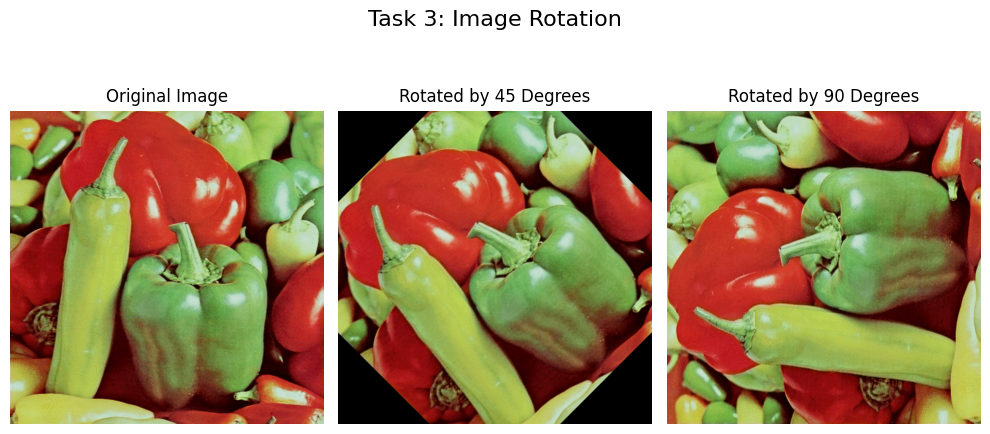

Task 3 complete. Results saved in: results/task3_image_rotation


In [ ]:
def rotate_image(image, angle):
    """
    Rotates an image by a given angle around its center.
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

# --- Run Task 3 ---
print("Performing Task 3: Rotating image...")
angles_to_test = [45, 90]
rotated_images = []
for angle in angles_to_test:
    img = rotate_image(image_color, angle)
    rotated_images.append(img)
    cv2.imwrite(os.path.join(task_dirs['task3'], f'rotated_{angle}_degrees.png'), img)

# --- Plot and save the combined result for Task 3 ---
plt.figure(figsize=(10, 5))
plt.suptitle("Task 3: Image Rotation", fontsize=16)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
for i, img in enumerate(rotated_images):
    plt.subplot(1, 3, i + 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Rotated by {angles_to_test[i]} Degrees")
    plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(task_dirs['task3'], 'task3_combined_plot.png'))
plt.show()
print("Task 3 complete. Results saved in:", task_dirs['task3'])
